In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
datapath = "arduino.log"

names = ["time", "pressure", "a", "T1", "T2", "P1", "P2", "N", "T"]

In [151]:
data = pd.read_csv(datapath, error_bad_lines=False, names=names, low_memory=False)

In [152]:
data[names[0]] = pd.to_datetime(data[names[0]])
for name in names[1:]:
    data[name] = pd.to_numeric(data[name], errors="coerce")

In [153]:
data.index = data.time
data.P1 /= data.N
data.P2 /= data.N
data = data.drop("time", axis=1)

In [154]:
data = data[data.index < "2018-06-18 18:00"]
data = data[data.index > "2018-06-15 12:00"]

In [155]:
rs = data.resample("120min").mean()

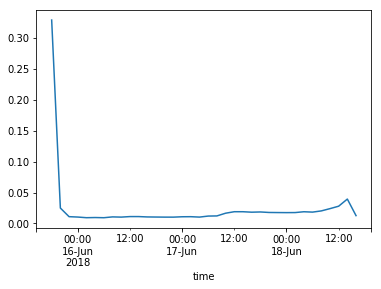

In [156]:
rs["P2"].plot()